<a href="https://colab.research.google.com/github/baralabhishek1/My-First-Github-upload/blob/master/user_desc%2Bimage_conv2d_onwatsondata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install os_sys

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of os-sys to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of os-sys to determine which version is compatible with other requirements. This could take a while.
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:

!pip install beautifulsoup4
!pip install emoji
!pip install pandas
!pip install numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 14.3 MB/s eta 0:00:00


In [ ]:
!pip install numpy pandas scikit-learn vaderSentiment beautifulsoup4 nltk emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 6.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import pickle
from collections import defaultdict
import re
from bs4 import BeautifulSoup
import sys
import emoji, string
import itertools
from nltk.tokenize import sent_tokenize, word_tokenize

# Update Keras imports to TensorFlow
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Embedding
from sklearn.model_selection import KFold
from tensorflow.keras.layers import Dense, Input, Flatten, Reshape
from tensorflow.keras.layers import Conv1D, MaxPool1D, Embedding, Dropout, LSTM, GRU, Bidirectional, TimeDistributed, concatenate, add, Conv2D, SpatialDropout1D, MaxPooling2D
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, precision_recall_fscore_support
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Layer, InputSpec
from tensorflow.keras import initializers
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import StratifiedKFold

import os, codecs
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1"

np.random.seed(100)


In [ ]:
!pip install tensorflow keras


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
MAX_SENT_LENGTH = 100
MAX_SENTS = 15
MAX_NB_WORDS = 20000
EMBEDDING_DIM = 300
VALIDATION_SPLIT = 0.1
TEST_SPLIT = 0.2


 DATA CLEANING

In [ ]:
# emoticons
def load_dict_smileys():

    return {
        ":‑)":"smiley",
        ":-]":"smiley",
        ":-3":"smiley",
        ":->":"smiley",
        "8-)":"smiley",
        ":-}":"smiley",
        ":)":"smiley",
        ":]":"smiley",
        ":3":"smiley",
        ":>":"smiley",
        "8)":"smiley",
        ":}":"smiley",
        ":o)":"smiley",
        ":c)":"smiley",
        ":^)":"smiley",
        "=]":"smiley",
        "=)":"smiley",
        ":-))":"smiley",
        ":‑D":"smiley",
        "8‑D":"smiley",
        "x‑D":"smiley",
        "X‑D":"smiley",
        ":D":"smiley",
        "8D":"smiley",
        "xD":"smiley",
        "XD":"smiley",
        ":‑(":"sad",
        ":‑c":"sad",
        ":‑<":"sad",
        ":‑[":"sad",
        ":(":"sad",
        ":c":"sad",
        ":<":"sad",
        ":[":"sad",
        ":-||":"sad",
        ">:[":"sad",
        ":{":"sad",
        ":@":"sad",
        ">:(":"sad",
        ":'‑(":"sad",
        ":'(":"sad",
        ":‑P":"playful",
        "X‑P":"playful",
        "x‑p":"playful",
        ":‑p":"playful",
        ":‑Þ":"playful",
        ":‑þ":"playful",
        ":‑b":"playful",
        ":P":"playful",
        "XP":"playful",
        "xp":"playful",
        ":p":"playful",
        ":Þ":"playful",
        ":þ":"playful",
        ":b":"playful",
        "<3":"love"
        }

# self defined contractions
def load_dict_contractions():

    return {
        "ain't":"is not",
        "amn't":"am not",
        "aren't":"are not",
        "can't":"cannot",
        "'cause":"because",
        "couldn't":"could not",
        "couldn't've":"could not have",
        "could've":"could have",
        "daren't":"dare not",
        "daresn't":"dare not",
        "dasn't":"dare not",
        "didn't":"did not",
        "doesn't":"does not",
        "don't":"do not",
        "e'er":"ever",
        "em":"them",
        "everyone's":"everyone is",
        "finna":"fixing to",
        "gimme":"give me",
        "gonna":"going to",
        "gon't":"go not",
        "gotta":"got to",
        "hadn't":"had not",
        "hasn't":"has not",
        "haven't":"have not",
        "he'd":"he would",
        "he'll":"he will",
        "he's":"he is",
        "he've":"he have",
        "how'd":"how would",
        "how'll":"how will",
        "how're":"how are",
        "how's":"how is",
        "i'd":"i would",
        "i'll":"i will",
        "i'm":"i am",
        "i'm'a":"i am about to",
        "i'm'o":"i am going to",
        "isn't":"is not",
        "it'd":"it would",
        "it'll":"it will",
        "it's":"it is",
        "i've":"i have",
        "kinda":"kind of",
        "let's":"let us",
        "mayn't":"may not",
        "may've":"may have",
        "mightn't":"might not",
        "might've":"might have",
        "mustn't":"must not",
        "mustn't've":"must not have",
        "must've":"must have",
        "needn't":"need not",
        "ne'er":"never",
        "o'":"of",
        "o'er":"over",
        "ol'":"old",
        "oughtn't":"ought not",
        "shalln't":"shall not",
        "shan't":"shall not",
        "she'd":"she would",
        "she'll":"she will",
        "she's":"she is",
        "shouldn't":"should not",
        "shouldn't've":"should not have",
        "should've":"should have",
        "somebody's":"somebody is",
        "someone's":"someone is",
        "something's":"something is",
        "that'd":"that would",
        "that'll":"that will",
        "that're":"that are",
        "that's":"that is",
        "there'd":"there would",
        "there'll":"there will",
        "there're":"there are",
        "there's":"there is",
        "these're":"these are",
        "they'd":"they would",
        "they'll":"they will",
        "they're":"they are",
        "they've":"they have",
        "this's":"this is",
        "those're":"those are",
        "'tis":"it is",
        "'twas":"it was",
        "wanna":"want to",
        "wasn't":"was not",
        "we'd":"we would",
        "we'd've":"we would have",
        "we'll":"we will",
        "we're":"we are",
        "weren't":"were not",
        "we've":"we have",
        "what'd":"what did",
        "what'll":"what will",
        "what're":"what are",
        "what's":"what is",
        "what've":"what have",
        "when's":"when is",
        "where'd":"where did",
        "where're":"where are",
        "where's":"where is",
        "where've":"where have",
        "which's":"which is",
        "who'd":"who would",
        "who'd've":"who would have",
        "who'll":"who will",
        "who're":"who are",
        "who's":"who is",
        "who've":"who have",
        "why'd":"why did",
        "why're":"why are",
        "why's":"why is",
        "won't":"will not",
        "wouldn't":"would not",
        "would've":"would have",
        "y'all":"you all",
        "you'd":"you would",
        "you'll":"you will",
        "you're":"you are",
        "you've":"you have",
        "whatcha":"what are you",
        "luv":"love",
        "sux":"sucks"
        }

def reduce_lengthening(text):
    pattern = re.compile(r"(.)\1{2,}")
    return pattern.sub(r"\1\1", text)

def clean_str(string):

    string = re.sub(r'http\S+', '', string, flags=re.MULTILINE)
    string = re.sub(r'www.\S+', '', string, flags=re.MULTILINE)
#    string = re.sub(r'@\S+', '', string, flags=re.MULTILINE)
    string = re.sub(r"http\S+", "", string, flags=re.MULTILINE)
#    print(string)
    string = string.replace('\n', ' ').replace('\t', ' ')
    string = string.lower()
    string = reduce_lengthening(string)

    #CONTRACTIONS source: https://en.wikipedia.org/wiki/Contraction_%28grammar%29
    CONTRACTIONS = load_dict_contractions()
    string = string.replace("’","'").replace("“","'").replace("”","'").replace("’","'").replace("‘","'")
    words = string.split()
    reformed = [CONTRACTIONS[word] if word in CONTRACTIONS else word for word in words]
    string = " ".join(reformed)

    #Deal with emoticons source: https://en.wikipedia.org/wiki/List_of_emoticons
    SMILEY = load_dict_smileys()
    words = string.split()
    reformed = [SMILEY[word] if word in SMILEY else word for word in words]
    string = " ".join(reformed)

    #Deal with emojis
    string = emoji.demojize(string)

    string = ' '.join(string.split())

    string = re.sub('[^A-Za-z0-9.?;!]+', ' ', string).lstrip().lower()
    string = string.replace(";"," ; ").replace("."," . ").replace("?"," ? ").replace("!"," ! ")

    string = ' '.join(string.split())

#    load()
#    segs = segment(string)
#    print(segs)
#    string = ' '.join(segs)
#    print(string)

    return string.strip().lower()

Attention Layer Code

In [ ]:
import tensorflow as tf
from keras.layers import Layer
from keras import initializers

class AttLayer(Layer):
    def __init__(self, attention_dim):
        super(AttLayer, self).__init__()
        self.attention_dim = attention_dim
        self.supports_masking = True

    def build(self, input_shape):
        # Check that input shape has 3 dimensions (batch_size, timesteps, features)
        assert len(input_shape) == 3

        # Initialize the weights using add_weight, which Keras can manage
        self.W = self.add_weight(name='W',
                                 shape=(input_shape[-1], self.attention_dim),
                                 initializer='normal',
                                 trainable=True)
        self.b = self.add_weight(name='b',
                                 shape=(self.attention_dim,),
                                 initializer='normal',
                                 trainable=True)
        self.u = self.add_weight(name='u',
                                 shape=(self.attention_dim, 1),
                                 initializer='normal',
                                 trainable=True)

        super(AttLayer, self).build(input_shape)

    def compute_mask(self, inputs, mask=None):
        # Mask is not used in this attention mechanism, so return None
        return None

    def call(self, x, mask=None):
        # Compute the attention scores
        uit = tf.tanh(tf.keras.backend.bias_add(tf.matmul(x, self.W), self.b))  # Shape: [batch_size, timesteps, attention_dim]
        ait = tf.matmul(uit, self.u)  # Shape: [batch_size, timesteps, 1]
        ait = tf.squeeze(ait, -1)  # Shape: [batch_size, timesteps]

        ait = tf.exp(ait)  # Exponentiate to get attention weights

        if mask is not None:
            ait *= tf.cast(mask, tf.float32)  # Apply the mask

        # Normalize the attention scores
        ait /= tf.cast(tf.reduce_sum(ait, axis=1, keepdims=True) + K.epsilon(), tf.float32)

        # Compute the weighted input and return the output
        ait = tf.expand_dims(ait, axis=-1)  # Shape: [batch_size, timesteps, 1]
        weighted_input = x * ait  # Apply attention weights
        output = tf.reduce_sum(weighted_input, axis=1)  # Shape: [batch_size, features]

        return output

    def compute_output_shape(self, input_shape):
        # The output shape will be [batch_size, features] (same number of features as input)
        return (input_shape[0], input_shape[-1])


Extracting the Dataset file to use in future

In [ ]:
import zipfile


zip_file = '/content/drive/MyDrive/Dataset.zip'


with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/')



In [ ]:
import cv2
from skimage.transform import resize
import numpy
prof_feat = np.load('/content/drive/MyDrive/profile_feats.npy', allow_pickle=True)

print(prof_feat.shape)

for i in range(len(prof_feat)):
	prof_feat[i] = resize(prof_feat[i], (48, 48, 3)).astype(int)

features = []

for i in range(len(prof_feat)):
    features.append(prof_feat[i])

features = np.array(features)
print(features.shape)

nRows,nCols,nDims = features.shape[1:]
features = features.reshape(features.shape[0], nRows, nCols, nDims)
input_shape = (nRows, nCols, nDims)

pos_df = pd.read_csv('/content/drive/MyDrive/Dataset/pos_tweets.csv', sep=',', lineterminator='\n')
neg_df = pd.read_csv('/content/drive/MyDrive/Dataset/neg_tweets.csv', sep=',', lineterminator='\n')

print(pos_df)
print(neg_df)

(10603,)
(10603, 48, 48, 3)
                                       user_description
0                                               alright
1     ADHD & Diverse-Ability Transition Coach/Traine...
2     queer trans bot | she/her | property of @Corde...
3                    People tend to say I'm stone cold.
4     Hi, I'm Kris. I'm an okay cross/cosplayer. he/...
...                                                 ...
5887  I like lots of groups and I watch dramas. 17. ...
5888                           live and let live•WSU•♎️
5889                       I love Robbie Kay and music!
5890  A Northern Star! \n\nThe latest News! Tips and...
5891                                          dog luver

[5892 rows x 1 columns]
                                       user_description
0     Food addict, sweet tooth, house music and tequ...
1     Bollywood and Celebrities Brands Breaking News...
2             ‏‏‏حساب شخصي. مدمن كرة قدم. CFC #Ittihad#
3                                      IG: _RichyRo

In [ ]:
pos_df = pos_df.dropna(subset=['user_description'])
neg_df = neg_df.dropna(subset=['user_description'])

pos_df['labels'] = 0
neg_df['labels'] = 1

print(pos_df)
print(neg_df)


                                       user_description  labels
0                                               alright       0
1     ADHD & Diverse-Ability Transition Coach/Traine...       0
2     queer trans bot | she/her | property of @Corde...       0
3                    People tend to say I'm stone cold.       0
4     Hi, I'm Kris. I'm an okay cross/cosplayer. he/...       0
...                                                 ...     ...
5887  I like lots of groups and I watch dramas. 17. ...       0
5888                           live and let live•WSU•♎️       0
5889                       I love Robbie Kay and music!       0
5890  A Northern Star! \n\nThe latest News! Tips and...       0
5891                                          dog luver       0

[5892 rows x 2 columns]
                                       user_description  labels
0     Food addict, sweet tooth, house music and tequ...       1
1     Bollywood and Celebrities Brands Breaking News...       1
2             ‏

In [ ]:
df = [pos_df, neg_df]

train = pd.concat(df)

print(train)

                                       user_description  labels
0                                               alright       0
1     ADHD & Diverse-Ability Transition Coach/Traine...       0
2     queer trans bot | she/her | property of @Corde...       0
3                    People tend to say I'm stone cold.       0
4     Hi, I'm Kris. I'm an okay cross/cosplayer. he/...       0
...                                                 ...     ...
4702  ‏‏‏‏‏‏.\n.\nلا تحرص على كثرة الأصحاب والمعارف ...       1
4703  YouTuber & Twitch Streamer. Just a dude with a...       1
4704                      Forbes reserved space for me.       1
4705  Future SoftwareDeveloper|| #Chelsea || Passion...       1
4706                              Apparently i eat ass.       1

[10599 rows x 2 columns]


In [ ]:
pos_df['labels'] = 0
neg_df['labels'] = 1
print(pos_df)
print(neg_df)

                                       user_description  labels
0                                               alright       0
1     ADHD & Diverse-Ability Transition Coach/Traine...       0
2     queer trans bot | she/her | property of @Corde...       0
3                    People tend to say I'm stone cold.       0
4     Hi, I'm Kris. I'm an okay cross/cosplayer. he/...       0
...                                                 ...     ...
5887  I like lots of groups and I watch dramas. 17. ...       0
5888                           live and let live•WSU•♎️       0
5889                       I love Robbie Kay and music!       0
5890  A Northern Star! \n\nThe latest News! Tips and...       0
5891                                          dog luver       0

[5892 rows x 2 columns]
                                       user_description  labels
0     Food addict, sweet tooth, house music and tequ...       1
1     Bollywood and Celebrities Brands Breaking News...       1
2             ‏

In [ ]:
df = [pos_df, neg_df]

train = pd.concat(df)

print(train)

                                       user_description  labels
0                                               alright       0
1     ADHD & Diverse-Ability Transition Coach/Traine...       0
2     queer trans bot | she/her | property of @Corde...       0
3                    People tend to say I'm stone cold.       0
4     Hi, I'm Kris. I'm an okay cross/cosplayer. he/...       0
...                                                 ...     ...
4702  ‏‏‏‏‏‏.\n.\nلا تحرص على كثرة الأصحاب والمعارف ...       1
4703  YouTuber & Twitch Streamer. Just a dude with a...       1
4704                      Forbes reserved space for me.       1
4705  Future SoftwareDeveloper|| #Chelsea || Passion...       1
4706                              Apparently i eat ass.       1

[10599 rows x 2 columns]


In [ ]:
train = train.reset_index()

In [ ]:

!pip install ekphrasis

from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons

text_processor = TextPreProcessor(
    # terms that will be normalized
    normalize=['url', 'email', 'percent', 'money', 'phone', 'user',
        'time', 'url', 'date', 'number'],
    # terms that will be annotated
    annotate={"hashtag", "allcaps", "elongated", "repeated",
        'emphasis', 'censored'},
    fix_html=True,  # fix HTML tokens

    # corpus from which the word statistics are going to be used
    # for word segmentation
    segmenter="twitter",

    # corpus from which the word statistics are going to be used
    # for spell correction
    corrector="twitter",

    unpack_hashtags=True,  # perform word segmentation on hashtags
    unpack_contractions=True,  # Unpack contractions (can't -> can not)
    spell_correct_elong=True,  # spell correction for elongated words

    # select a tokenizer. You can use SocialTokenizer, or pass your own
    # the tokenizer, should take as input a string and return a list of tokens
    tokenizer=SocialTokenizer(lowercase=True).tokenize,

    # list of dictionaries, for replacing tokens extracted from the text,
    # with other expressions. You can pass more than one dictionaries.
    dicts=[emoticons]
)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.8/83.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.3 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/ekphrasis/classes/tokenizer.py:225: FutureWarning: Possible nested set at position 2190
  self.tok = re.compile(r"({})".format("|".join(pipeline)))


Word statistics files not found!
Downloading... done!
Unpacking... done!
Reading twitter - 1grams ...
generating cache file for faster loading...
reading ngrams /root/.ekphrasis/stats/twitter/counts_1grams.txt
Reading twitter - 2grams ...
generating cache file for faster loading...
reading ngrams /root/.ekphrasis/stats/twitter/counts_2grams.txt
Reading twitter - 1grams ...


/usr/local/lib/python3.10/dist-packages/ekphrasis/classes/exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in


In [ ]:
print(train)


       index                                   user_description  labels
0          0                                            alright       0
1          1  ADHD & Diverse-Ability Transition Coach/Traine...       0
2          2  queer trans bot | she/her | property of @Corde...       0
3          3                 People tend to say I'm stone cold.       0
4          4  Hi, I'm Kris. I'm an okay cross/cosplayer. he/...       0
...      ...                                                ...     ...
10594   4702  ‏‏‏‏‏‏.\n.\nلا تحرص على كثرة الأصحاب والمعارف ...       1
10595   4703  YouTuber & Twitch Streamer. Just a dude with a...       1
10596   4704                      Forbes reserved space for me.       1
10597   4705  Future SoftwareDeveloper|| #Chelsea || Passion...       1
10598   4706                              Apparently i eat ass.       1

[10599 rows x 3 columns]


In [ ]:
from nltk import tokenize

textonly = []; descronly = []; labels = []

for idx in range(train.user_description.shape[0]):

    text = " ".join(text_processor.pre_process_doc(train.user_description[idx]))
    textonly.append(text)

    descr = " ".join(text_processor.pre_process_doc(train.user_description[idx]))
    descronly.append(descr)
    labels.append(train.labels[idx])

textonly = descronly

In [ ]:
print(train.columns)



Index(['index', 'user_description', 'labels'], dtype='object')


In [ ]:
# At this point, textonly and descronly should contain the preprocessed data
# You can check them by printing some samples
print(textonly[:5])
print(descronly[:5])
print(labels[:5])

['alright', '<allcaps> adhd </allcaps> & diverse - ability transition coach / trainer - post - secondary students , career exploration & entrepreneurs . <number> <allcaps> ednns </allcaps> entrepreneur of the year . <hashtag> str ad degies </hashtag>', 'queer trans bot | she / her | property of <user>', 'people tend to say i am stone cold .', 'hi , i am kris . i am an okay cross / cosplayer . he / they , trans masc / genderqueer . thank you !']
['alright', '<allcaps> adhd </allcaps> & diverse - ability transition coach / trainer - post - secondary students , career exploration & entrepreneurs . <number> <allcaps> ednns </allcaps> entrepreneur of the year . <hashtag> str ad degies </hashtag>', 'queer trans bot | she / her | property of <user>', 'people tend to say i am stone cold .', 'hi , i am kris . i am an okay cross / cosplayer . he / they , trans masc / genderqueer . thank you !']
[0, 0, 0, 0, 0]


In [ ]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(textonly)

textdata = np.zeros((len(textonly), MAX_SENT_LENGTH), dtype='int32')
#descrdata = np.zeros((len(descronly), MAX_SENT_LENGTH), dtype='int32')

for i, sent in enumerate(textonly):
    wordTokens = text_to_word_sequence(sent)
    k = 0
    for _, word in enumerate(wordTokens):
        if k < MAX_SENT_LENGTH and tokenizer.word_index[word] < MAX_NB_WORDS:
            textdata[i, k] = tokenizer.word_index[word]
            k = k + 1


word_index = tokenizer.word_index
print('\nTotal %s unique tokens.' % len(word_index))

labels = to_categorical(np.asarray(labels))
print('\nShape of data tensor:', textdata.shape)
print('Shape of label tensor:', labels.shape)


Total 24388 unique tokens.

Shape of data tensor: (10599, 100)
Shape of label tensor: (10599, 2)


In [ ]:
print(len(textdata))  # Length of textdata
print(len(labels))     # Length of labels
print(len(features))   # Length of features
print(len(textonly))   # Length of textonly


10599
10599
10603
10599


In [ ]:
min_len = min(len(textdata), len(labels), len(features), len(textonly))
textdata = textdata[:min_len]
labels = labels[:min_len]
features = features[:min_len]
textonly = textonly[:min_len]


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test, prof_feat_train, prof_feat_test, train_text, test_text = train_test_split(textdata, labels, features, textonly, test_size=0.2, random_state=42, stratify = labels)


print(len(x_test), len(test_text))
print(test_text[:5])

2120 2120
['secondary creation werewolf germany from hetalia bot . return follows are automatic . please check out the manual ! [ botmaster : <user> | icon : official art ]', 'make my own jewellery / cards listen to dayshell / <allcaps> ptv </allcaps> / <allcaps> sws </allcaps> / young guns / <allcaps> bmth </allcaps> / <allcaps> atl </allcaps> / <allcaps> bfmv </allcaps> and <allcaps> omm </allcaps> . <repeated> ect also a caring person', 'i belong to <user> / <hashtag> hillbilly princess </hashtag> / kinda crazy / <hashtag> jiz </hashtag> / ig : twilitwolfy', '사랑해', '1 0 k a show . dm me for booking']


In [ ]:
print("\nLoading GloVe model, this can take some time...\n...")
embeddings_index = {}
f = open('/content/drive/MyDrive/glove.6B.300d.txt', encoding='utf-8')
#f = open('word2vec_cdotdata.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    try:
        coefs = np.asarray(values[1:], dtype='float')
        embeddings_index[word] = coefs
    except ValueError:
        continue
f.close()
print("Completed loading pretrained models.")


Loading GloVe model, this can take some time...
...
Completed loading pretrained models.


In [ ]:
print('\nTotal %s word vectors.' % len(embeddings_index))


Total 400000 word vectors.


## building Hierachical Attention network

In [ ]:
embedding_matrix = np.random.random((len(word_index) + 1, 300))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector


target_names_dep = ['dep', 'non-dep']

embedding_layer = Embedding(len(word_index) + 1,
                            300,
                            weights=[embedding_matrix],
                            input_length=MAX_SENT_LENGTH,
                            trainable=False,
                            mask_zero=True)

sentence_input = Input(shape=(MAX_SENT_LENGTH,), dtype='int32')
descr_input = Input(shape=input_shape, dtype='float32')

conv = Conv2D(5, (2, 2), padding='same', activation='relu', input_shape=input_shape)(descr_input)
conv = MaxPooling2D(pool_size=(3, 3))(conv)
conv = Conv2D(5, (2, 2), activation='relu')(conv)
conv = MaxPooling2D(pool_size=(2, 2))(conv)
conv = Dropout(0.25)(conv)

conv = Flatten()(conv)

conv = Dense(100, activation='relu')(conv)
conv = Dropout(0.25)(conv)

embedded_sequences = embedding_layer(sentence_input)

l_gru = Bidirectional(GRU(128, return_sequences=True))(embedded_sequences)
l_att_sent1 = AttLayer(100)(l_gru)
l_att_sent1 = Dropout(0.25)(l_att_sent1)

l_att_sent1 = Dense(100, activation='relu')(l_att_sent1)
l_att_sent1 = Dropout(0.25)(l_att_sent1)

out_emo = Dense(100, activation='relu')(concatenate([l_att_sent1, conv], axis=-1))
out_emo = Dropout(0.25)(out_emo)

out_emo = Dense(2, activation='softmax', name='out_emo')(out_emo)

model = Model([sentence_input, descr_input], out_emo)


model.compile(optimizer='adam',
                   loss = {'out_emo':'categorical_crossentropy'},
                   metrics = {'out_emo':'accuracy'})


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
weight_file = 'Weights/user_desc+image_conv2d.keras'
callback = [ModelCheckpoint(weight_file, monitor='val_acc', verbose=1, save_best_only=True, mode='max')]


model.fit([x_train, prof_feat_train], y_train, batch_size=64, epochs=15, shuffle=True, validation_split=0.1, verbose=1, callbacks=callback)
model.load_weights(weight_file)
model.save('models/user_desc+image_conv2d.h5')

Epoch 1/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 97s 724ms/step - accuracy: 0.5998 - loss: 0.6617 - val_accuracy: 0.6521 - val_loss: 0.6078
Epoch 2/15


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_acc available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


120/120 ━━━━━━━━━━━━━━━━━━━━ 87s 728ms/step - accuracy: 0.6660 - loss: 0.6060 - val_accuracy: 0.6616 - val_loss: 0.5984
Epoch 3/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 88s 735ms/step - accuracy: 0.6858 - loss: 0.5796 - val_accuracy: 0.6616 - val_loss: 0.6089
Epoch 4/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 88s 736ms/step - accuracy: 0.7102 - loss: 0.5441 - val_accuracy: 0.6733 - val_loss: 0.6138
Epoch 5/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 139s 708ms/step - accuracy: 0.7348 - loss: 0.5170 - val_accuracy: 0.6816 - val_loss: 0.6185
Epoch 6/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 142s 712ms/step - accuracy: 0.7599 - loss: 0.4725 - val_accuracy: 0.6333 - val_loss: 0.6493
Epoch 7/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 143s 718ms/step - accuracy: 0.7898 - loss: 0.4312 - val_accuracy: 0.6663 - val_loss: 0.6869
Epoch 8/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 142s 715ms/step - accuracy: 0.8096 - loss: 0.3881 - val_accuracy: 0.6651 - val_loss: 0.7152
Epoch 9/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 92s 769ms/step - accuracy: 0.8416 - loss: 0.3377 -

FileNotFoundError: [Errno 2] No such file or directory: 'Weights/user_desc+image_conv2d.keras'

In [ ]:
# Check the lengths of all variables involved in train_test_split
print(len(textdata))        # Length of textdata
print(len(labels))          # Length of labels
print(len(sadness))         # Length of sadness
print(len(joy))             # Length of joy
print(len(fear))            # Length of fear
print(len(disgust))         # Length of disgust
print(len(anger))           # Length of anger
print(len(sentiment))       # Length of sentiment
print(len(features))        # Length of features
print(len(cat1))            # Length of cat1
print(len(cat2))            # Length of cat2
print(len(cat3))            # Length of cat3
print(len(textonly))        # Length of textonly


10599
10599
10603
10603
10603
10603
10603
10603
10603
10599
10599
10599
10599


In [ ]:
# Check the first few rows of the train DataFrame
print(train.head())


   index                                   user_description sentiment  labels
0      0                                            alright  positive       0
1      1  ADHD & Diverse-Ability Transition Coach/Traine...  positive       0
2      2  queer trans bot | she/her | property of @Corde...  positive       0
3      3                 People tend to say I'm stone cold.  positive       0
4      4  Hi, I'm Kris. I'm an okay cross/cosplayer. he/...  positive       0


In [ ]:
print(train.head())

   index                                   user_description sentiment  labels
0      0                                            alright  positive       0
1      1  ADHD & Diverse-Ability Transition Coach/Traine...  positive       0
2      2  queer trans bot | she/her | property of @Corde...  positive       0
3      3                 People tend to say I'm stone cold.  positive       0
4      4  Hi, I'm Kris. I'm an okay cross/cosplayer. he/...  positive       0


In [ ]:
print(len(textdata))
print(len(labels))
print(len(sadness))
print(len(joy))
# ... check other variables similarly


10599
10599
10603
10603


In [ ]:
min_length = min(len(textdata), len(labels), len(sadness), len(joy), len(fear), len(disgust), len(anger), len(sentiment), len(features), len(cat1), len(cat2), len(cat3), len(textonly))
textdata = textdata[:min_length]
labels = labels[:min_length]
sadness = sadness[:min_length]
joy = joy[:min_length]
fear = fear[:min_length]
disgust = disgust[:min_length]
anger = anger[:min_length]
sentiment = sentiment[:min_length]
features = features[:min_length]
cat1 = cat1[:min_length]
cat2 = cat2[:min_length]
cat3 = cat3[:min_length]
textonly = textonly[:min_length]

In [ ]:
print("Length of textdata:", len(textdata))
print("Length of labels:", len(labels))
print("Length of sadness:", len(sadness))
print("Length of joy:", len(joy))
print("Length of fear:", len(fear))
print("Length of disgust:", len(disgust))
print("Length of anger:", len(anger))
print("Length of sentiment:", len(sentiment))
print("Length of features:", len(features))
print("Length of cat1:", len(cat1))
print("Length of cat2:", len(cat2))
print("Length of cat3:", len(cat3))
print("Length of textonly:", len(textonly))



Length of textdata: 10599
Length of labels: 10599
Length of sadness: 10599
Length of joy: 10599
Length of fear: 10599
Length of disgust: 10599
Length of anger: 10599
Length of sentiment: 10599
Length of features: 10599
Length of cat1: 10599
Length of cat2: 10599
Length of cat3: 10599
Length of textonly: 10599


In [ ]:
from sklearn.model_selection import train_test_split

# Ensure all inputs are numpy arrays or lists with the same length
x_train, x_test, y_train, y_test, sad_train, sad_test, joy_train, joy_test, fear_train, fear_test, dis_train, dis_test, ang_train, ang_test, sent_train, sent_test, prof_feat_train, prof_feat_test, cat1_train, cat1_test, cat2_train, cat2_test, cat3_train, cat3_test, train_text, test_text = train_test_split(
    textdata,
    labels,
    sadness, joy, fear, disgust, anger, sentiment, features, cat1, cat2, cat3, textonly,
    test_size=0.2,
    random_state=42,
    stratify=labels
)

# Print the length of test data and some test text examples to confirm
print(len(x_test), len(test_text))
print(test_text[:5])  # Show the first 5 test text samples


2120 2120
['<hashtag> poetry </hashtag> <hashtag> micro poetry </hashtag> shortlisted for atlantis short story <number> . inspired by my love of <hashtag> words </hashtag> <hashtag> nature </hashtag> . volunteer facilitator with <user>', '<date> ❤️ sc : lexi_sheridan', 'pirate . princess . psych student . dancer . irn bru junkie . im right here overthinking .', 'this is <allcaps> smak penabur </allcaps> gading serpong official twitter account . we invite students , alumni , parents , teachers to follow our account to get the updated news', '<hashtag> anw 10 </hashtag> <hashtag> seahawk nation </hashtag> <number> / <number> of <hashtag> melgan </hashtag> <url>']


In [ ]:
sad_train = np.array(sad_train)
sad_test = np.array(sad_test)
sad_train = np.nan_to_num(sad_train)
sad_test = np.nan_to_num(sad_test)

joy_train = np.array(joy_train)
joy_test = np.array(joy_test)
joy_train = np.nan_to_num(joy_train)
joy_test = np.nan_to_num(joy_test)

fear_train = np.array(fear_train)
fear_test = np.array(fear_test)
fear_train = np.nan_to_num(fear_train)
fear_test = np.nan_to_num(fear_test)

dis_train = np.array(dis_train)
dis_test = np.array(dis_test)
dis_train = np.nan_to_num(dis_train)
dis_test = np.nan_to_num(dis_test)

ang_train = np.array(ang_train)
ang_test = np.array(ang_test)
ang_train = np.nan_to_num(ang_train)
ang_test = np.nan_to_num(ang_test)

sent_train = np.array(sent_train)
sent_test = np.array(sent_test)
sent_train = np.nan_to_num(sent_train)
sent_test = np.nan_to_num(sent_test)


In [ ]:
print("\nLoading GloVe model, this can take some time...\n...")
embeddings_index = {}
f = open('/content/drive/MyDrive/glove.6B.300d.txt', encoding='utf-8')
#f = open('word2vec_cdotdata.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    try:
        coefs = np.asarray(values[1:], dtype='float')
        embeddings_index[word] = coefs
    except ValueError:
        continue
f.close()
print("Completed loading pretrained models.")


Loading GloVe model, this can take some time...
...
Completed loading pretrained models.


In [ ]:
print('\nTotal %s word vectors.' % len(embeddings_index))


Total 59942 word vectors.


###Building Hierachical Attention network

##Training the model and Saving

In [ ]:
print(x_train.shape)  # Should be (n_samples, MAX_SENT_LENGTH)
print(prof_feat_train.shape)  # Should match input_shape
print(cat1_train.shape)  # Should be (n_samples, 20)
print(cat2_train.shape)  # Should be (n_samples, 20)
print(cat3_train.shape)  # Should be (n_samples, 20)
print(y_train.shape)  # Should match number of emotion classes, e.g., (n_samples, 2)


(8479, 100)
(8479, 48, 48, 3)
(8479, 20)
(8479, 20)
(8479, 20)
(8479, 3)


In [ ]:
import numpy as np
from keras.models import Model
from keras.layers import Input, Embedding, GRU, Bidirectional, Dense, Dropout, Conv2D, MaxPooling2D, Flatten, concatenate
from keras.callbacks import ModelCheckpoint
import keras.backend as K

# Assuming the necessary parameters are already defined
MAX_SENT_LENGTH = 100
MAX_SENTS = 15
MAX_NB_WORDS = 20000
EMBEDDING_DIM = 300
VALIDATION_SPLIT = 0.1
TEST_SPLIT = 0.2

# Load or initialize your word embedding matrix
embedding_matrix = np.random.random((len(word_index) + 1, 300))  # Replace with actual pre-trained embeddings if needed

# Assuming you have a function to calculate Pearson correlation, and a custom attention layer
def pearson_cf(y_true, y_pred):
    a = y_true - K.mean(y_true)
    b = y_pred - K.mean(y_pred)
    num = K.sum(a * b)
    den = K.sqrt(K.sum(a**2) * K.sum(b**2))
    return (num/(den+0.000001))

# Define input layers
sentence_input = Input(shape=(MAX_SENT_LENGTH,), dtype='int32', name='sentence_input')
descr_input = Input(shape=(48, 48, 3), dtype='float32', name='descr_input')
cat1_input = Input(shape=(20,), dtype='int32', name='cat1_input')
cat2_input = Input(shape=(20,), dtype='int32', name='cat2_input')
cat3_input = Input(shape=(20,), dtype='int32', name='cat3_input')

# Embedding layer for text input
embedding_layer = Embedding(len(word_index) + 1, EMBEDDING_DIM, weights=[embedding_matrix], input_length=MAX_SENT_LENGTH, trainable=False, mask_zero=True)

# Embedding layer for categorical inputs
embedding_layer1 = Embedding(len(word_index) + 1, EMBEDDING_DIM, weights=[embedding_matrix], input_length=20, trainable=False, mask_zero=True)

# Sentence-level GRU + Attention
embedded_sequences = embedding_layer(sentence_input)
l_gru = Bidirectional(GRU(128, return_sequences=True))(embedded_sequences)
l_att_sent1 = AttLayer(100)(l_gru)  # You will need to implement or define the `AttLayer`
l_att_sent1 = Dropout(0.25)(l_att_sent1)
l_att_sent1 = Dense(100, activation='relu')(l_att_sent1)
l_att_sent1 = Dropout(0.25)(l_att_sent1)

# Category-level GRU + Attention for categorical features
embedded_sequences_cat1 = embedding_layer1(cat1_input)
l_gru1 = Bidirectional(GRU(128, return_sequences=True))(embedded_sequences_cat1)
l_att_sent11 = AttLayer(100)(l_gru1)
l_att_sent11 = Dropout(0.25)(l_att_sent11)
l_att_sent11 = Dense(100, activation='relu')(l_att_sent11)
l_att_sent11 = Dropout(0.25)(l_att_sent11)

# Repeat for cat2_input and cat3_input
embedded_sequences_cat2 = embedding_layer1(cat2_input)
l_gru2 = Bidirectional(GRU(128, return_sequences=True))(embedded_sequences_cat2)
l_att_sent12 = AttLayer(100)(l_gru2)
l_att_sent12 = Dropout(0.25)(l_att_sent12)
l_att_sent12 = Dense(100, activation='relu')(l_att_sent12)
l_att_sent12 = Dropout(0.25)(l_att_sent12)

embedded_sequences_cat3 = embedding_layer1(cat3_input)
l_gru3 = Bidirectional(GRU(128, return_sequences=True))(embedded_sequences_cat3)
l_att_sent13 = AttLayer(100)(l_gru3)
l_att_sent13 = Dropout(0.25)(l_att_sent13)
l_att_sent13 = Dense(100, activation='relu')(l_att_sent13)
l_att_sent13 = Dropout(0.25)(l_att_sent13)

# CNN for image features (prof_feat_train)
conv = Conv2D(5, (2, 2), padding='same', activation='relu')(descr_input)
conv = MaxPooling2D(pool_size=(3, 3))(conv)
conv = Conv2D(5, (2, 2), activation='relu')(conv)
conv = MaxPooling2D(pool_size=(2, 2))(conv)
conv = Dropout(0.25)(conv)
conv = Flatten()(conv)
conv = Dense(100, activation='relu')(conv)
conv = Dropout(0.25)(conv)

# Concatenate all features (text, categorical, image)
out_emo1 = Dense(450, activation='relu')(concatenate([l_att_sent1, l_att_sent11, l_att_sent12, l_att_sent13, conv], axis=-1))
out_emo1 = Dropout(0.25)(out_emo1)

# Output layer (Emotion classification)
out_emo = Dense(3, activation='softmax', name='out_emo')(out_emo1)

# Model compilation
model = Model([sentence_input, descr_input, cat1_input, cat2_input, cat3_input], out_emo)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Set learning rate
model.optimizer.learning_rate = 1e-3

# Define model checkpoint callback
weight_file = 'weights/user_desc+image_conv2d+cat.keras'
callback = [ModelCheckpoint(weight_file, monitor='val_acc', verbose=1, save_best_only=True, mode='max')]

# Train the model
model.fit([x_train, prof_feat_train, cat1_train, cat2_train, cat3_train], y_train, batch_size=64, epochs=15, shuffle=True, validation_split=0.1, verbose=1, callbacks=callback)

# Load best weights
model.load_weights(weight_file)

# Save final model
model.save('models/user_desc+image_conv2d+cat.h5')


Epoch 1/15


AttributeError: Exception encountered when calling AttLayer.call().

[1mmodule 'keras.backend' has no attribute 'tanh'[0m

Arguments received by AttLayer.call():
  • x=tf.Tensor(shape=(None, 20, 256), dtype=float32)
  • mask=tf.Tensor(shape=(None, 20), dtype=bool)

(8479, 3)


In [ ]:
import tensorflow as tf

In [ ]:
# Define the input shapes based on the given constants
num_features_descr = 50   # Set based on your description feature size
num_features_cat1 = 10    # Set based on your category 1 feature size
num_features_cat2 = 10    # Set based on your category 2 feature size
num_features_cat3 = 10    # Set based on your category 3 feature size

In [ ]:
print(x_train.shape)
print(prof_feat_train.shape)
print(cat1_train.shape)
print(cat2_train.shape)
print(cat3_train.shape)
print(y_train.shape)


(8479, 100)
(8479, 48, 48, 3)
(8479, 20)
(8479, 20)
(8479, 20)


AttributeError: 'list' object has no attribute 'shape'

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=3)  # Adjust num_classes based on your output layer


In [ ]:
# building Hierachical Attention network
embedding_matrix = np.random.random((len(word_index) + 1, 300))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

def pearson_cf(y_true, y_pred):
    a = y_true - K.mean(y_true)
    b = y_pred - K.mean(y_pred)
    num = K.sum(a * b)
    den = K.sqrt(K.sum(a**2) * K.sum(b**2))
    return (num/(den+0.000001))

target_names_dep = ['dep', 'non-dep']

embedding_layer = Embedding(len(word_index) + 1,
                            300,
                            weights=[embedding_matrix],
                            input_length=MAX_SENT_LENGTH,
                            trainable=False,
                            mask_zero=True)

embedding_layer1 = Embedding(len(word_index) + 1,
                            300,
                            weights=[embedding_matrix],
                            input_length=20,
                            trainable=False,
                            mask_zero=True)


sentence_input = Input(shape=(MAX_SENT_LENGTH,), dtype='int32')
descr_input = Input(shape=input_shape, dtype='float32')
cat1_input = Input(shape=(20,), dtype='int32')
cat2_input = Input(shape=(20,), dtype='int32')
cat3_input = Input(shape=(20,), dtype='int32')

sent_input = Input(shape=(1,))

conv = Conv2D(5, (2, 2), padding='same', activation='relu', input_shape=input_shape)(descr_input)
conv = MaxPooling2D(pool_size=(3, 3))(conv)
conv = Conv2D(5, (2, 2), activation='relu')(conv)
conv = MaxPooling2D(pool_size=(2, 2))(conv)
conv = Dropout(0.25)(conv)

conv = Flatten()(conv)

conv = Dense(100, activation='relu')(conv)
conv = Dropout(0.25)(conv)

embedded_sequences = embedding_layer(sentence_input)

l_gru = Bidirectional(GRU(128, return_sequences=True))(embedded_sequences)
l_att_sent1 = AttLayer(100)(l_gru)
l_att_sent1 = Dropout(0.25)(l_att_sent1)

l_att_sent1 = Dense(100, activation='relu')(l_att_sent1)
l_att_sent1 = Dropout(0.25)(l_att_sent1)

embedded_sequences_cat1 = embedding_layer1(cat1_input)

l_gru1 = Bidirectional(GRU(128, return_sequences=True))(embedded_sequences_cat1)
l_att_sent11 = AttLayer(100)(l_gru1)
l_att_sent11 = Dropout(0.25)(l_att_sent11)

l_att_sent11 = Dense(100, activation='relu')(l_att_sent11)
l_att_sent11 = Dropout(0.25)(l_att_sent11)

embedded_sequences_cat2 = embedding_layer1(cat2_input)

l_gru2 = Bidirectional(GRU(128, return_sequences=True))(embedded_sequences_cat2)
l_att_sent12 = AttLayer(100)(l_gru2)
l_att_sent12 = Dropout(0.25)(l_att_sent12)

l_att_sent12 = Dense(100, activation='relu')(l_att_sent12)
l_att_sent12 = Dropout(0.25)(l_att_sent12)

embedded_sequences_cat3 = embedding_layer1(cat3_input)

l_gru3 = Bidirectional(GRU(128, return_sequences=True))(embedded_sequences_cat3)
l_att_sent13 = AttLayer(100)(l_gru3)
l_att_sent13 = Dropout(0.25)(l_att_sent13)

l_att_sent13 = Dense(100, activation='relu')(l_att_sent13)
l_att_sent13 = Dropout(0.25)(l_att_sent13)

out_emo1 = Dense(450, activation='relu')(concatenate([l_att_sent1, l_att_sent11, l_att_sent12, l_att_sent13, conv], axis=-1))
out_emo1 = Dropout(0.25)(out_emo1)

out_emo = Dense(3, activation='softmax', name='out_emo')(out_emo1)

model = Model(inputs=[sentence_input, descr_input, cat1_input, cat2_input, cat3_input], outputs=out_emo)

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

weight_file = '/content/drive/MyDrive/Weights/user_desc+image_conv2d.keras'
callback = [ModelCheckpoint(weight_file, monitor='val_acc', verbose=1, save_best_only=True, mode='max')]

# Change learning rate to 1e-3
model.optimizer.learning_rate.assign(1e-3)

# Now you can train the model
model.fit([x_train, prof_feat_train, cat1_train, cat2_train, cat3_train],
          y_train,  # Output labels
          batch_size=64,  # Batch size
          epochs=15,  # Number of epochs
          shuffle=True,  # Shuffle data each epoch
          validation_split=0.1,  # Validation split (10%)
          verbose=1,  # Verbosity level (1 = progress bar)
          callbacks=callback)  # Model checkpoint callback



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_855', 'keras_tensor_856', 'keras_tensor_857', 'keras_tensor_858', 'keras_tensor_859']. Received: the structure of inputs=('*', '*', '*', '*', '*')
  warnings.warn(


120/120 ━━━━━━━━━━━━━━━━━━━━ 157s 1s/step - accuracy: 0.5874 - loss: 0.7017 - val_accuracy: 0.6592 - val_loss: 0.6093
Epoch 2/15


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_acc available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


120/120 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.6729 - loss: 0.6027 - val_accuracy: 0.6757 - val_loss: 0.5832
Epoch 3/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.7009 - loss: 0.5616 - val_accuracy: 0.6698 - val_loss: 0.5842
Epoch 4/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.7418 - loss: 0.5182 - val_accuracy: 0.6710 - val_loss: 0.6026
Epoch 5/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.7698 - loss: 0.4734 - val_accuracy: 0.6828 - val_loss: 0.5813
Epoch 6/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.7935 - loss: 0.4335 - val_accuracy: 0.6816 - val_loss: 0.6279
Epoch 7/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - accuracy: 0.8325 - loss: 0.3770 - val_accuracy: 0.6816 - val_loss: 0.6715
Epoch 8/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.8542 - loss: 0.3219 - val_accuracy: 0.6910 - val_loss: 0.6804
Epoch 9/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.8774 - loss: 0.2856 - val_accuracy: 0.692

67/67 ━━━━━━━━━━━━━━━━━━━━ 15s 186ms/step

Test Accuracy: 0.6476415094339623

Test P_R_F Score: Precision=0.642107992372286, Recall=0.637834527179953, F1 Score=0.6385069408064361

Confusion Matrix:
[[855 324]
 [423 518]]

Classification Report:
              precision    recall  f1-score   support

         dep       0.67      0.73      0.70      1179
     non-dep       0.62      0.55      0.58       941

    accuracy                           0.65      2120
   macro avg       0.64      0.64      0.64      2120
weighted avg       0.65      0.65      0.64      2120




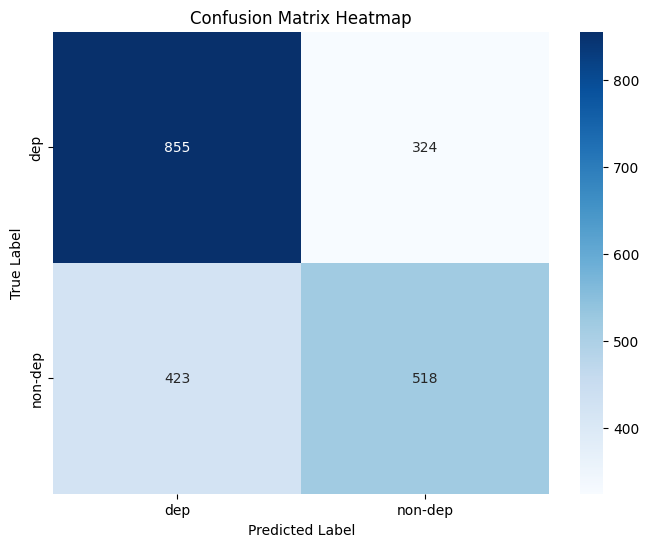


Metrics saved to 'depression_metrics.txt'
Heatmap saved to 'confusion_matrix_heatmap.png'


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    confusion_matrix,
    classification_report,
)
from tensorflow.keras.utils import to_categorical
import seaborn as sns

# Predict probabilities
a = model.predict([x_test, prof_feat_test])

# Get predictions and ground truth
pred1_test = np.argmax(a, axis=1)
classes_test = np.argmax(to_categorical(y_test), axis=1)[:, 1]
predictions1_test = np.array(pred1_test)

# Compute metrics
accuracy = accuracy_score(classes_test, predictions1_test)
precision, recall, f1_score, _ = precision_recall_fscore_support(
    classes_test, predictions1_test, average="macro"
)
classification_rep = classification_report(
    classes_test, predictions1_test, target_names=target_names_dep
)
conf_matrix = confusion_matrix(classes_test, predictions1_test)

# Save Metrics to a File
with open("/content/drive/MyDrive/Weights/user_desc+image_conv2d.keras", "w") as f:
    f.write(f"Test Accuracy: {accuracy}\n")
    f.write(f"Test P_R_F Score: Precision={precision}, Recall={recall}, F1 Score={f1_score}\n")
    f.write(f"Confusion Matrix:\n{conf_matrix}\n")
    f.write(f"Classification Report:\n{classification_rep}\n")

# Print Metrics to Console
print(f"\nTest Accuracy: {accuracy}\n")
print(f"Test P_R_F Score: Precision={precision}, Recall={recall}, F1 Score={f1_score}\n")
print(f"Confusion Matrix:\n{conf_matrix}\n")
print(f"Classification Report:\n{classification_rep}\n")

# Visualization: Heatmap for Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=target_names_dep,
    yticklabels=target_names_dep,
)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Save the heatmap as a PNG file
heatmap_file = "confusion_matrix_heatmap.png"
plt.savefig(heatmap_file, dpi=300, bbox_inches="tight")
plt.show()

print(f"\nMetrics saved to 'depression_metrics.txt'")
print(f"Heatmap saved to '{heatmap_file}'")


ValueError: I/O operation on closed file.